# Dynamic Mazes
To create a dynamic maze, we created a function that updates the maze. We assume that the maze passed is perfect, and hence we need to ensure that the maze is connected after updation. Since adding a wall will always create a section of the maze that is disconnected, we have to remove and add mazes in pairs. 

In [1]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze, INF

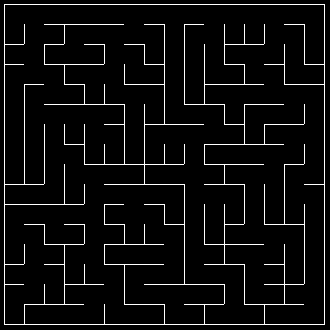

In [2]:
maze = Maze()
maze.load("Sidewinder_16x16.maze")
display(maze.draw(cell_width = 20))

In [3]:
# Implementation of DSU in Python
class dset:
    def __init__(self, data):
        self.data = data
        self.parent = self

    def find(self):
        if self.parent == self:
            return self

        return self.parent.find()

    def union(self, set2):
        p1 = self.find()
        p2 = set2.find()
        p1.parent = p2

In [4]:
def dynamic(maze, num):
    if num > maze.num_rows + maze.num_columns:
        num = maze.num_rows + maze.num_columns
    
    for i in range(0, num):
        while True:
            # Generate point in maze
            x = random.randint(0, maze.num_columns-1)
            y = random.randint(0, maze.num_rows-1)
            
            
            directions = []
            # Randomly check all walls
            if maze.grid[x][y].neighbors['N'] != INF:
                directions.append('N')
            if maze.grid[x][y].neighbors['S'] != INF:
                directions.append('S')
            if maze.grid[x][y].neighbors['E'] != INF:
                directions.append('E')
            if maze.grid[x][y].neighbors['W'] != INF:
                directions.append('W')
            
            if len(directions) == 0:
                continue
           
            direction = random.choice(directions)
            maze.add_path((y, x), direction, INF) 
            break
    
    
    color = []
    for i in range(0, maze.num_rows):
        color.append([])
        for j in range(0, maze.num_columns):
            color[i].append(-1)
    
    cur = 0
    for x in range(0, maze.num_rows):
        for y in range(0, maze.num_columns):
            if color[x][y] == -1:
                queue = []
                queue.append((x, y))
                while len(queue):                        
                    cx, cy = queue.pop(0)
                    if color[cx][cy] == cur:
                        continue
                    color[cx][cy] = cur
                    if cx != 0 and maze.grid[cx][cy].neighbors['N'] != INF and color[cx-1][cy] == -1:
                        queue.append((cx-1, cy))
                    if cx != maze.num_rows-1 and maze.grid[cx][cy].neighbors['S'] != INF and color[cx+1][cy] == -1:
                        queue.append((cx+1, cy))
                    if cy != 0 and maze.grid[cx][cy].neighbors['W'] != INF and color[cx][cy-1] == -1:
                        queue.append((cx, cy-1))
                    if cy != maze.num_columns-1 and maze.grid[cx][cy].neighbors['E'] != INF and color[cx][cy+1] == -1:
                        queue.append((cx, cy+1))
                cur += 1
    pprint(color)

[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4],
 [0, 5, 2, 2, 2, 2, 3, 1, 1, 1, 4, 4, 4, 4, 4, 6],
 [0, 5, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 4, 4, 6, 6],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 6, 6],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 6, 6],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 7, 4, 4, 4, 4, 6],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 4, 4, 4, 6],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 8, 6],
 [2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 4, 4, 6, 6],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 1, 1, 1, 6, 6, 6]]


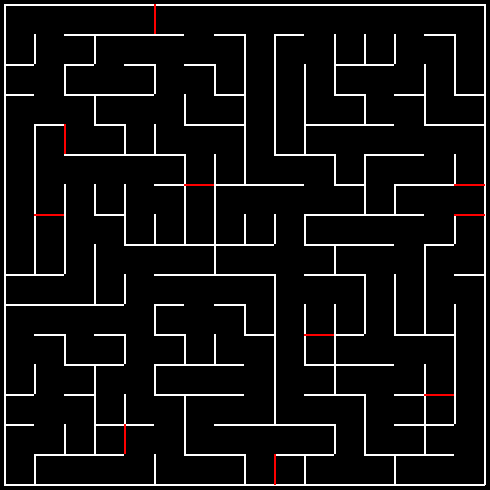

In [5]:
dynam_maze = Maze()
dynam_maze.load("Sidewinder_16x16.maze")
dynamic(dynam_maze, 10)
display(maze.diff(dynam_maze, cell_width = 30))